In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import seaborn as sns
import folium
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings(action='ignore')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_csv('/users/jjong/desktop/vscode/CWNU_ICT/src/2022 표준지 공시지가.csv')
df.head(3)

,일련번호,시군구,읍면동리,지번구분,본번지,부번지,시도명,시군구명,소재지,지목,...,용도지역2,이용상황,주위환경,지세명,형상명,도로교통,공시지가,지리적위치1,지리적위치2,방위
0,1,11110,10100,1,0003,52,서울특별시,종로구,청운동 3-52,공원,...,NaN,공원등,시가지주변 야산지대,급경사지,부정형,세로(불),493500,경기상고,북측 인근,NaN
1,2,11110,10100,1,0004,2,서울특별시,종로구,청운동 4-2,임야,...,NaN,자연림,시가지주변 야산지대,완경사지,부정형,맹지,730500,경가상고,북서측 근거리,남향
2,3,11110,10100,1,0004,15,서울특별시,종로구,청운동 4-15,대,...,NaN,단독주택,기존 주택지대,완경사지,사다리형,세로(가),4250000,경기상고,북서측 인근,북동향


In [3]:
from geopy.geocoders import Nominatim
from tqdm import tqdm

address = df['시도명'] + " " + df['시군구명'] + " " + df['소재지']
geo_local = Nominatim(user_agent='South Korea')

# 위도, 경도 반환하는 함수
def geocoding(address):
    try:
        geo = geo_local.geocode(address)
        x_y = [geo.latitude, geo.longitude]
        return x_y

    except:
        return [0,0]

In [4]:
df = df.iloc[:, 6:]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540050 entries, 0 to 540049
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   시도명     540050 non-null  object 
 1   시군구명    537528 non-null  object 
 2   소재지     540050 non-null  object 
 3   지목      540050 non-null  object 
 4   면적      540050 non-null  float64
 5   용도지역1   540050 non-null  object 
 6   용도지역2   5398 non-null    object 
 7   이용상황    540050 non-null  object 
 8   주위환경    540050 non-null  object 
 9   지세명     540050 non-null  object 
 10  형상명     540050 non-null  object 
 11  도로교통    540050 non-null  object 
 12  공시지가    540050 non-null  int64  
 13  지리적위치1  540050 non-null  object 
 14  지리적위치2  515324 non-null  object 
 15  방위      207781 non-null  object 
dtypes: float64(1), int64(1), object(14)
memory usage: 65.9+ MB


In [5]:
df['지목'].unique()

array(['공원', '임야', '대', '주유소용지', '사적지', '학교용지', '잡종지', '전', '주차장', '종교용지',
       '철도용지', '하천', '공장용지', '도로', '과수원', '답', '창고용지', '유원지', '묘지', '제방',
       '수도용지', '광천지', '체육용지', '목장용지', '유지', '염전', '구거', '양어장'],
      dtype=object)

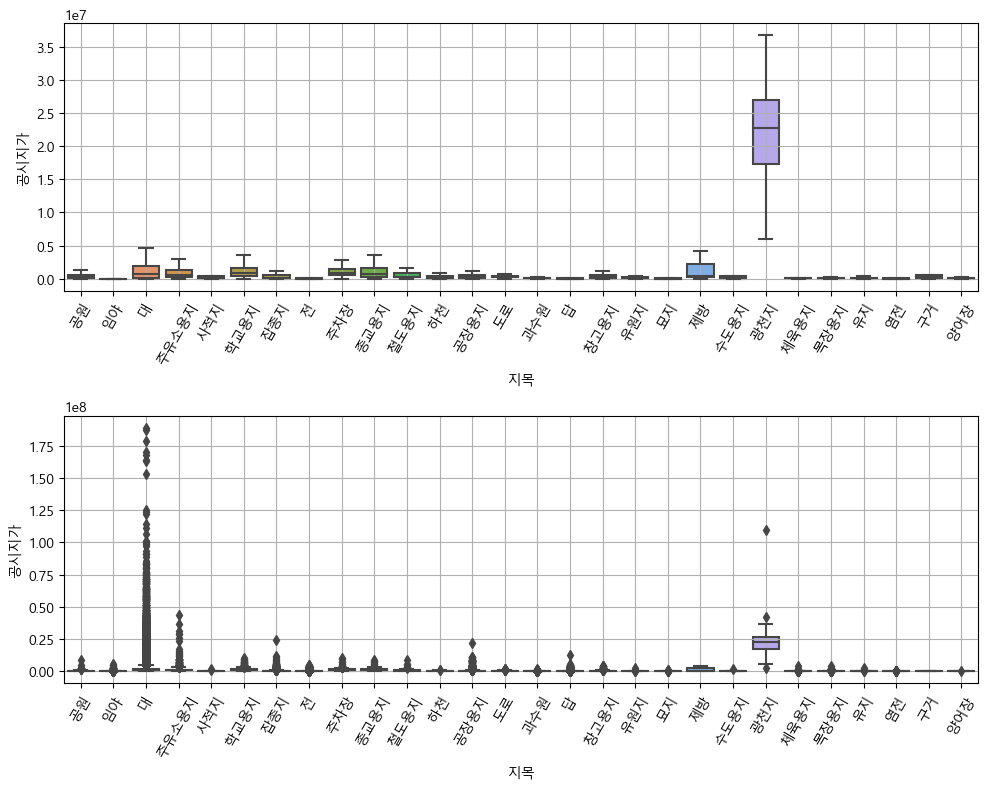

In [104]:
fig, axes = plt.subplots(2, 1, figsize=(10,8))
sns.boxplot(data=df, x='지목', y='공시지가', showfliers=False, ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=60)
axes[0].grid(True)
sns.boxplot(data=df, x='지목', y='공시지가', ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=60)
axes[1].grid(True)
plt.tight_layout()
plt.show()

In [93]:
# fig = px.box(df, x='지목', y='공시지가', color='지목', notched=True, title='지목별 공시지가 분포')
# fig.update_layout(xaxis_tickangle=-60, yaxis=dict(title='공시지가'), showlegend=False)
# fig.show()


In [6]:
print(len(df[df['지목'] == '광천지'].sort_values(by='공시지가', ascending=False)))
df[df['지목'] == '광천지'].sort_values(by='공시지가', ascending=False)[:3]

21


,시도명,시군구명,소재지,지목,면적,용도지역1,용도지역2,이용상황,주위환경,지세명,형상명,도로교통,공시지가,지리적위치1,지리적위치2,방위
58338,대구광역시,수성구,두산동 888-9,광천지,1.0,자연녹지지역,NaN,광천지,온천 관광지대,완경사지,정방형,맹지,110000000,호텔수성,내,NaN
39260,부산광역시,북구,화명동 1383-10,광천지,2.0,제2종일반주거지역,NaN,광천지,주택 및 상가혼용지대,평지,가로장방형,맹지,42400000,화명온천,내,NaN
37535,부산광역시,동래구,온천동 142-19,광천지,3.0,일반상업지역,NaN,광천지,온천지대,평지,정방형,세로(가),36700000,천일온천호텔,내,NaN


In [81]:
adr = address[df[df['지목'] == '광천지'].sort_values(by='공시지가', ascending=False).index]

lat = []
lon = []
for c in tqdm(adr):
    loc = geocoding(c)
    lat.append(loc[0])
    lon.append(loc[1])

m = folium.Map(location=[lat[3], lon[3]], zoom_start=7, tiles="Stamen Terrain")
tooltip = "Click me!"
for i in range(len(adr)):
    folium.Marker(
        [lat[i], lon[i]], popup=f"<b>No.{i+1}<br>{adr.iloc[i]}<br>{df.loc[adr.index[i]]['공시지가']}</b>", tooltip=tooltip
    ).add_to(m)

m

  0%|          | 0/21 [00:00<?, ?it/s]

100%|██████████| 21/21 [00:10<00:00,  1.94it/s]


In [7]:
housing = df[df['지목'] == '대']
housing.head()

,시도명,시군구명,소재지,지목,면적,용도지역1,용도지역2,이용상황,주위환경,지세명,형상명,도로교통,공시지가,지리적위치1,지리적위치2,방위
2,서울특별시,종로구,청운동 4-15,대,416.2,제1종일반주거지역,NaN,단독주택,기존 주택지대,완경사지,사다리형,세로(가),4250000,경기상고,북서측 인근,북동향
3,서울특별시,종로구,청운동 8-9,대,811.3,제1종일반주거지역,NaN,연립주택,일반 주택지대,급경사지,부정형,세로(가),3930000,청운중학교,서측인근,남향
4,서울특별시,종로구,청운동 8-15,대,442.3,제1종일반주거지역,NaN,연립주택,기존 주택지대,급경사지,사다리형,세로(가),3855000,경기상고,서측인근,남서향
5,서울특별시,종로구,청운동 12-3,대,132.5,제1종일반주거지역,NaN,주거기타,기존 주택지대,완경사지,사다리형,세로(불),4645000,경기상고,뷱서측인근,남동향
6,서울특별시,종로구,청운동 15-12,대,552.1,제1종일반주거지역,NaN,단독주택,고급 주택지대,완경사지,사다리형,소로각지,5930000,청운중학교,북서측인근,서향


In [7]:
df['용도지역1'].unique()

array(['자연녹지지역', '제1종일반주거지역', '제2종일반주거지역', '일반상업지역', '제3종일반주거지역', '준주거지역',
       '제1종전용주거지역', '개발제한구역', '중심상업지역', '보전녹지지역', '근린상업지역', '준공업지역',
       '유통상업지역', '제2종전용주거지역', '생산녹지지역', '일반공업지역', '전용공업지역', '자연환경보전지역',
       '농림지역', '보전관리지역', '생산관리지역', '계획관리지역', '관리지역', '용도미지정지역'],
      dtype=object)

In [114]:
df.loc[(df['용도지역1'].str.contains('주거')) & (df['지목'] != '대')]['용도지역1'].unique()

array(['제1종일반주거지역', '제2종일반주거지역', '제1종전용주거지역', '제3종일반주거지역', '준주거지역',
       '제2종전용주거지역'], dtype=object)

# 용도지역1로는 주거지역과 상업지역을 나눌 수 없다

In [94]:
df[df['용도지역1'].str.contains('주거')]['지목'].unique()

array(['임야', '대', '주유소용지', '공원', '학교용지', '잡종지', '전', '주차장', '종교용지',
       '철도용지', '답', '하천', '묘지', '제방', '도로', '사적지', '공장용지', '창고용지', '수도용지',
       '광천지', '과수원', '체육용지', '유지', '목장용지', '염전'], dtype=object)

In [110]:
df[df['용도지역1'].str.contains('상업')]['지목'].unique()

array(['대', '공원', '주유소용지', '학교용지', '주차장', '철도용지', '창고용지', '잡종지', '임야',
       '공장용지', '광천지', '전', '답', '과수원', '종교용지', '유원지', '염전', '목장용지', '하천'],
      dtype=object)

In [8]:
df.groupby('용도지역1')['공시지가'].mean().sort_values(ascending=False)

용도지역1
중심상업지역       6.267489e+06
제3종일반주거지역    4.173300e+06
일반상업지역       3.626962e+06
근린상업지역       3.284609e+06
준주거지역        2.661046e+06
준공업지역        2.085087e+06
제1종전용주거지역    2.034941e+06
제2종일반주거지역    2.016155e+06
유통상업지역       1.556408e+06
제2종전용주거지역    1.157211e+06
제1종일반주거지역    1.021573e+06
일반공업지역       5.337461e+05
전용공업지역       4.989618e+05
용도미지정지역      3.136431e+05
개발제한구역       1.970224e+05
자연녹지지역       1.903828e+05
생산녹지지역       1.203428e+05
보전녹지지역       1.037272e+05
계획관리지역       7.727397e+04
생산관리지역       2.885367e+04
자연환경보전지역     2.448503e+04
농림지역         2.328915e+04
보전관리지역       2.293998e+04
관리지역         2.211491e+04
Name: 공시지가, dtype: float64

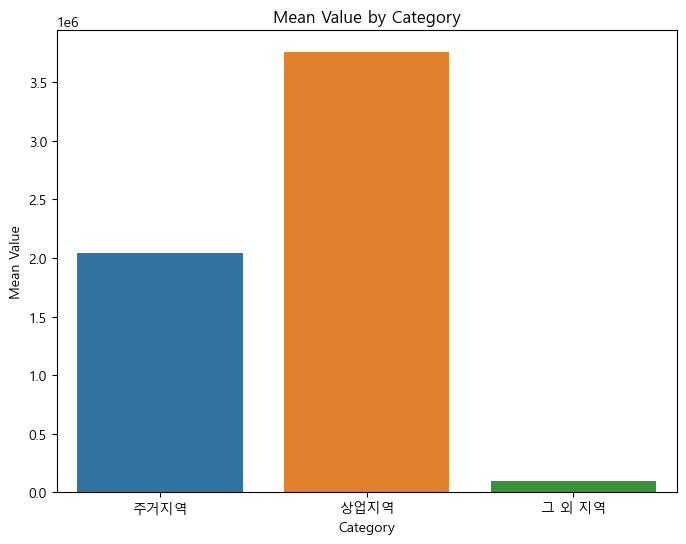

In [130]:
residential = df[df['용도지역1'].str.contains('주거')]['공시지가'].mean()
commerce = df[df['용도지역1'].str.contains('상업')]['공시지가'].mean()
ect = df[~(df['용도지역1'].str.contains('주거') | df['용도지역1'].str.contains('상업'))]['공시지가'].mean()

# 데이터프레임 생성
data = pd.DataFrame()
data = {'Category': ['주거지역', '상업지역', '그 외 지역'],
        'Mean Value': [residential, commerce, ect]}

# 그래프 그리기
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='Category', y='Mean Value')
plt.xlabel('Category')
plt.ylabel('Mean Value')
plt.title('Mean Value by Category')
plt.show()

In [13]:
adr = df.nlargest(5, '공시지가')['시도명'] + ' ' + df.nlargest(5, '공시지가')['소재지']
lat = []
lon = []
for c in tqdm(adr):
    loc = geocoding(c)
    lat.append(loc[0])
    lon.append(loc[1])

100%|██████████| 5/5 [00:06<00:00,  1.21s/it]


In [30]:
m = folium.Map(location=[lat[0], lon[0]], zoom_start=9, tiles="Stamen Terrain")

tooltip = "Click me!"

folium.Marker(
    [lat[0], lon[0]], popup=f"<b>{adr.iloc[0]}</b>", tooltip=tooltip, icon=folium.Icon(color="red", icon="info-sign")
).add_to(m)
folium.Marker(
    [lat[1], lon[1]], popup=f"<i>{adr.iloc[1]}</i>", tooltip=tooltip, icon=folium.Icon(color="green", icon="ok-sign")
).add_to(m)

m


In [8]:
df['이용상황'].unique()

array(['공원등', '자연림', '단독주택', '연립주택', '주거기타', '상업기타', '상업용', '다세대', '업무용',
       '주상용', '주상기타', '주거나지', '임야기타', '상업나지', '아파트', '주상나지', '토지임야',
       '전기타', '전', '기타', '공업기타', '공업용', '하천등', '유해혐오', '터미널', '조림',
       '운동장등', '과수원', '전창고', '콘도', '공업나지', '답', '주차장등', '발전소', '도로등',
       '답기타', '공항', '특수기타', '골프장_대중제', '휴게소', '전축사', '유원지', '광천지', '공원묘지',
       '위험시설', '골프장_회원제', '답축사', '경마장', '목장용지', '답창고', '야영', '승마장',
       '양어·양식', '염전', '골프장_간이', '태양광', '광업용지', '스키장'], dtype=object)

In [10]:
df.groupby('이용상황')['공시지가'].mean().sort_values(ascending=False)

이용상황
광천지        2.621457e+07
업무용        1.156105e+07
상업용        3.779575e+06
상업기타       3.754890e+06
다세대        2.841345e+06
아파트        2.687128e+06
연립주택       2.488536e+06
주상기타       2.301805e+06
주상용        2.108111e+06
상업나지       1.996410e+06
터미널        1.650864e+06
주거기타       1.378549e+06
주상나지       1.166345e+06
공업기타       7.381012e+05
단독주택       7.134298e+05
공업용        6.317948e+05
주차장등       6.280417e+05
도로등        5.597115e+05
운동장등       5.401711e+05
주거나지       4.987857e+05
특수기타       4.950000e+05
공원등        4.512438e+05
공항         4.292424e+05
경마장        4.153750e+05
휴게소        4.129380e+05
콘도         4.085000e+05
공업나지       3.882539e+05
유해혐오       3.220104e+05
전창고        3.169926e+05
전기타        2.750378e+05
위험시설       2.696875e+05
발전소        2.602424e+05
승마장        2.339783e+05
하천등        2.019559e+05
야영         1.847222e+05
유원지        1.766955e+05
답창고        1.602558e+05
기타         1.601086e+05
전축사        1.408517e+05
답기타        1.127795e+05
임야기타       7.894902e+04
골프장_회원제    

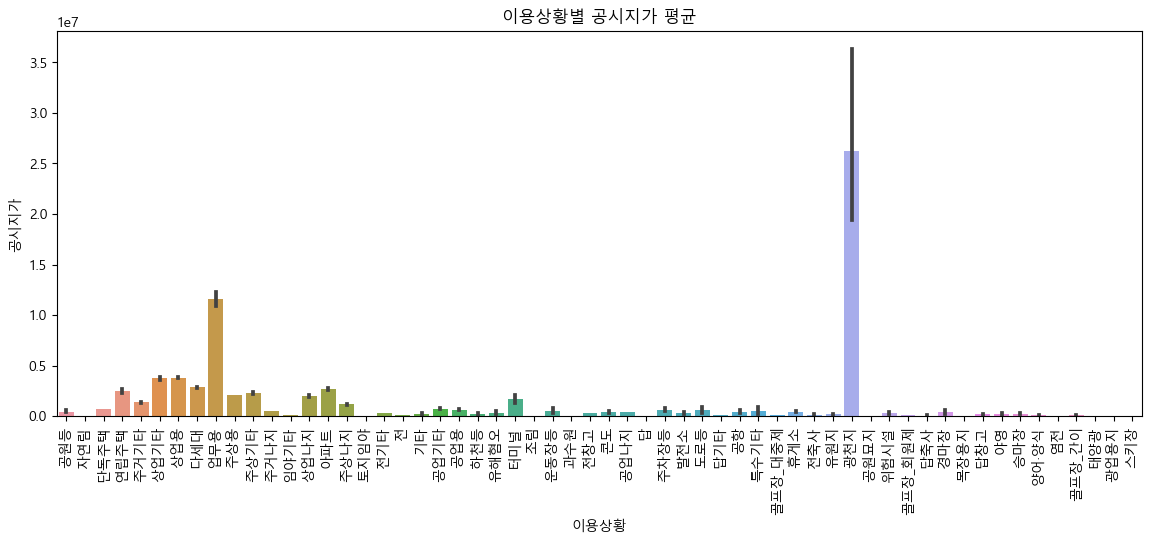

In [20]:
plt.figure(figsize=(14,5))
sns.barplot(x='이용상황', y='공시지가', data=df)
plt.xticks(rotation=90)
plt.title('이용상황별 공시지가 평균')
plt.show()

In [ ]:
residential = df[df['이용상황'].str.contains('주택|다세대|아파트|주상')]
residential.head()
commercial = df[df['이용상황'].str.contains('주상|상업|업무')]
commercial.head()

,시도명,시군구명,소재지,지목,면적,용도지역1,용도지역2,이용상황,주위환경,지세명,형상명,도로교통,공시지가,지리적위치1,지리적위치2,방위
10,서울특별시,종로구,청운동 39-3,대,138.2,제1종일반주거지역,NaN,상업기타,노선 상가지대,평지,사다리형,광대세각,6480000,경기상고,서측 인근,NaN
11,서울특별시,종로구,청운동 50-31,대,380.0,제2종일반주거지역,NaN,상업용,노선 상가지대,평지,사다리형,광대한면,6785000,경복고교,서측인근,NaN
28,서울특별시,종로구,청운동 114-1,대,165.7,제2종일반주거지역,NaN,업무용,노선 상가지대,평지,사다리형,광대세각,7350000,경기상고,남측인근,NaN
29,서울특별시,종로구,청운동 131,대,144.4,제2종일반주거지역,NaN,상업용,노선 상가지대,평지,사다리형,광대한면,7345000,청운초등학교,남측인근,NaN
40,서울특별시,종로구,신교동 31,대,141.5,제2종일반주거지역,NaN,상업용,주택 및 상가혼용지대,평지,사다리형,중로각지,6070000,서울맹학교,남동측인근,NaN


In [30]:
# # fig.add_trace(go.Pie(labels=df['도로교통'].unique(), values=df['도로교통'].value_counts()), row=2, col=1)
# # fig.add_trace(go.Pie(labels=df['방위'].unique(), values=df['방위'].value_counts()), row=2, col=2)

# # Create subplots: use 'domain' type for Pie subplot
# fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
# fig.add_trace(go.Pie(labels=df['지세명'].unique(), values=df['지세명'].value_counts(), name="지세명", hole=0.4, pull=[0,0,0.2]),
#               1, 1)
# fig.add_trace(go.Pie(labels=df['형상명'].unique(), values=df['형상명'].value_counts(), name="형상명", hole=0.4, pull=[0,0,0,0.2]),
#               1, 2)

# fig.update_layout(
#         title={
#         'text': "지세명과 형상명의 분포",
#         'y': 0.95,
#         'x': 0.5,
#         'xanchor': 'center',
#         'yanchor': 'top',
#         'font': {'size': 35}
#     },
#     # Add annotations in the center of the donut pies.
#     annotations=[dict(text='지세명', x=0.19, y=0.5, font_size=20, showarrow=False),
#                  dict(text='형상명', x=0.81, y=0.5, font_size=20, showarrow=False)])
# fig.show()


In [97]:
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=2, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=df['지세명'].unique(), values=df['지세명'].value_counts(), name="지세명", hole=0.4, pull=[0,0,0.2]),
              1, 1)
fig.add_trace(go.Pie(labels=df['형상명'].unique(), values=df['형상명'].value_counts(), name="형상명", hole=0.4, pull=[0,0,0,0.2]),
              1, 2)
fig.add_trace(go.Pie(labels=df['도로교통'].unique(), values=df['도로교통'].value_counts(), name="도로교통", hole=0.4, pull=[0,0,0,0,0.2]),
              2, 1)
fig.add_trace(go.Pie(labels=df['방위'].unique(), values=df['방위'].value_counts(), name="방위", hole=0.4),
              2, 2)

fig.update_layout(
        title={
        'text': "조건별 분포",
        'y': 0.55,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 35}
    },
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='지세명', x=0.19, y=0.8, font_size=20, showarrow=False),
                 dict(text='형상명', x=0.81, y=0.8, font_size=20, showarrow=False),
                 dict(text='도로교통', x=0.17, y=0.19, font_size=20, showarrow=False),
                 dict(text='방위', x=0.8, y=0.19, font_size=20, showarrow=False)])
fig.update_layout(
    height=600,  # 그래프 전체 높이 조정
    width=1000,  # 그래프 전체 너비 조정
    margin=dict(l=100, r=10, t=0, b=0),  # 그래프 여백 조정
)

fig.show()

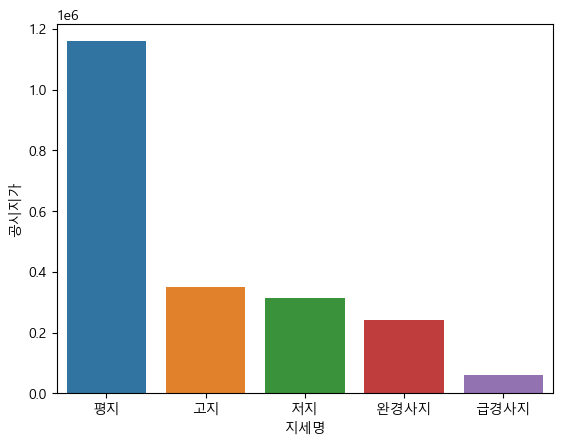

In [207]:
plt.figure()
jise = df.groupby('지세명')['공시지가'].mean().sort_values(ascending=False).reset_index()
sns.barplot(x=jise['지세명'], y=jise['공시지가'])
plt.show()

In [250]:
# # Tukey's fences를 사용하여 이상치 제거
# Q1 = df['공시지가'].quantile(0.25)
# Q3 = df['공시지가'].quantile(0.75)
# IQR = Q3 - Q1
# lower_fence = Q1 - 1.5 * IQR
# upper_fence = Q3 + 1.5 * IQR
# df = df[(df['공시지가'] >= lower_fence) & (df['공시지가'] <= upper_fence)]

# # 그래프 그리기
# fig = px.box(df, x='지세명', y='공시지가', color='지세명')

# fig.update_layout(title='지세명에 따른 공시지가', xaxis_title='지세명', yaxis_title='공시지가')

# fig.show()


In [254]:
df.sample()

,시도명,시군구명,소재지,지목,면적,용도지역1,용도지역2,이용상황,주위환경,지세명,형상명,도로교통,공시지가,지리적위치1,지리적위치2,방위
161680,경기도,여주시,흥천면 율극리 133,답,1987.0,농림지역,NaN,답,순수 농경지대,평지,사다리형,세로(가),30000,은골마을,북서측 근거리,NaN


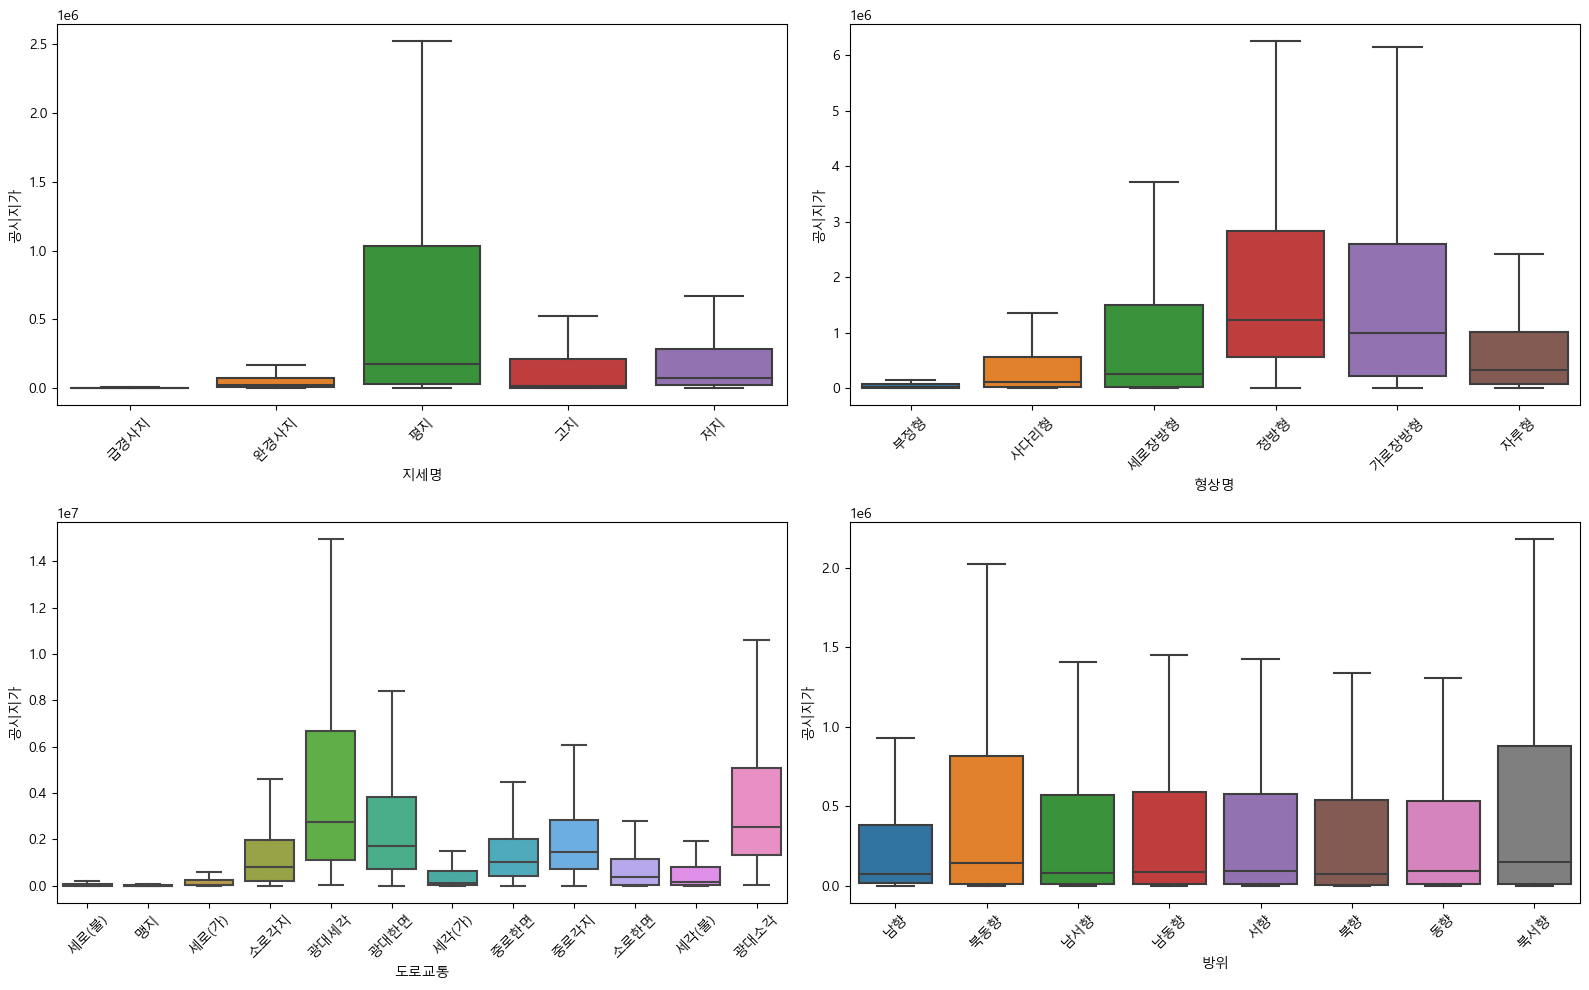

In [31]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
lst = ['지세명', '형상명', '도로교통', '방위']
for i, ax in enumerate(axes.flatten()):
    sns.boxplot(data=df, x=lst[i], y='공시지가', showfliers=False, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

In [228]:
# 데이터셋 불러오기
test = px.data.gapminder()

# 그래프 그리기
fig = px.scatter(test, x='gdpPercap', y='lifeExp', color='continent', size='pop',facet_col='year', facet_col_wrap=4)

fig.show()

In [98]:
import plotly.graph_objects as go
import pandas as pd

# 데이터 생성
data = {
    '지세명': ['A', 'B', 'C', 'D', 'E'],
    '2010': [1, 2, 3, 4, 5],
    '2011': [2, 3, 4, 5, 6],
    '2012': [3, 4, 5, 6, 7],
    '2013': [4, 5, 6, 7, 8],
    '2014': [5, 6, 7, 8, 9],
    '2015': [6, 7, 8, 9, 10],
    '2016': [7, 8, 9, 10, 11],
    '2017': [8, 9, 10, 11, 12],
    '2018': [9, 10, 11, 12, 13],
    '2019': [10, 11, 12, 13, 14],
    '2020': [11, 12, 13, 14, 15]
}
test_df = pd.DataFrame(data)

# Figure 생성
fig = go.Figure()

# 각 연도별 라인 그래프(Trace)를 추가
for year in range(2010, 2021):
    for label in test_df['지세명']:
        fig.add_trace(
            go.Scatter(
                visible=False,
                line=dict(width=3),
                name=str(year) + ' - ' + label,
                x=test_df['지세명'],
                y=test_df[str(year)]
            )
        )

# 초기 그래프 설정
for i in range(len(test_df['지세명'])):
    fig.data[i].visible = True

# 슬라이더 데이터 생성
steps = []
for i, year in enumerate(range(2010, 2021)):
    step = dict(
        method="update",
        args=[{"visible": [False] * len(fig.data)},
              {"title": "Year: " + str(year)}],
    )
    for j in range(i * len(test_df['지세명']), (i + 1) * len(test_df['지세명'])):
        step["args"][0]["visible"][j] = True
    steps.append(step)

# 슬라이더 추가
fig.update_layout(
    sliders=[dict(
        active=0,
        currentvalue={"prefix": "Year: "},
        steps=steps
    )]
)

fig.update_layout(
    title="지세명의 연도별 변화",
    xaxis=dict(title="지세명"),
    yaxis=dict(title="값")
)

fig.show()
